In [310]:
import geopandas as gpd
import pandas as pd

# Load the GeoJSON file
gdf = gpd.read_file("../data/raw/iou_sdge/Load_Capacity_MW__LCA__NDA_-5834481280674565521.geojson")


In [311]:
print(gdf.head())

   OBJECTID JOIN_COUNT TARGET_FID JOIN_FID SHAPE_LENG  VOLTAGE  \
0  22655091       None       None     None       None       12   
1  22655092       None       None     None       None       12   
2  22655093       None       None     None       None       12   
3  22655094       None       None     None       None       12   
4  22655095       None       None     None       None       12   

   LINE_SEGMENT_NUMBER  ICAWOF_UNIGENERATION  ICAWOF_UNILOAD  \
0               201326                   0.1             2.7   
1               201326                   0.1             2.7   
2               201326                   0.1             2.7   
3               201326                   0.1             2.7   
4               201331                   0.1             2.7   

   ICAWOF_PVGENERATION OHUG CIRCUIT_NAME LABELTEXT  ICAWNOF_UNIGENERATION  \
0                  2.0   UG         1235      None                    2.6   
1                  2.0   UG         1235      None              

In [312]:
import pandas as pd

# Create a mapping for the load capacity values
capacity_mapping = {
    "0*": 0,
    "Up To 1.00": 1,
    "1.00-1.50": 1.25,
    "1.50-2.00": 1.75,
    "Above 2": 2.5
}

# Map the LABELTEXT_LCA values to numeric values
gdf['numeric_capacity'] = gdf['LABELTEXT_LCA'].map(capacity_mapping)

# Filter for circuits where the capacity is 0
low_capacity_gdf = gdf[gdf['numeric_capacity'] == 1]

# Group by CIRCUIT_NAME and get the relevant details
grouped_low_capacity_gdf = low_capacity_gdf.groupby('CIRCUIT_NAME').agg({
    'numeric_capacity': 'min',
    'geometry': 'first',  # Keep the first geometry (adjust as needed)
    'SUBID': 'first'  # Assuming all entries for a circuit have the same substation
}).reset_index()

# Print the results
print(grouped_low_capacity_gdf[['CIRCUIT_NAME', 'numeric_capacity', 'SUBID', 'geometry']])


    CIRCUIT_NAME  numeric_capacity           SUBID  \
0           1006               1.0  PROCTOR VALLEY   
1           1023               1.0           LILAC   
2           1039               1.0             ASH   
3           1047               1.0    CHOLLAS WEST   
4           1071               1.0   LAGUNA NIGUEL   
..           ...               ...             ...   
254          983               1.0       MARGARITA   
255          985               1.0       MARGARITA   
256          990               1.0            PICO   
257          993               1.0            PICO   
258          995               1.0            PICO   

                                              geometry  
0    POLYGON ((-13020209.594 3850795.009, -13020209...  
1    POLYGON ((-13041491.403 3929164.521, -13041491...  
2    POLYGON ((-13034378.931 3918335.533, -13034378...  
3    POLYGON ((-13028898.582 3862708.063, -13028898...  
4    POLYGON ((-13102033.774 3967727.308, -13102034...  
..       

In [313]:
from pyproj import CRS

# Filter the GeoDataFrame to get the circuit with the name "287"
circuit_287 = gdf[gdf['CIRCUIT_NAME'] == '287']

print(circuit_287.crs) # EPSG:3857

# circuit_287_gdf = circuit_287.to_crs(epsg=4326)

print(circuit_287_gdf['geometry'])


EPSG:3857
1057      POLYGON ((-117.23499 33.05906, -117.23500 33.0...
1058      POLYGON ((-117.23499 33.05872, -117.23499 33.0...
1059      POLYGON ((-117.23499 33.05837, -117.23499 33.0...
1060      POLYGON ((-117.23417 33.05562, -117.23417 33.0...
1061      POLYGON ((-117.23417 33.05528, -117.23417 33.0...
                                ...                        
118441    POLYGON ((-117.24640 33.05113, -117.24640 33.0...
118442    POLYGON ((-117.24640 33.05079, -117.24640 33.0...
118443    POLYGON ((-117.24640 33.05045, -117.24640 33.0...
120942    POLYGON ((-117.28314 33.05552, -117.28314 33.0...
120943    POLYGON ((-117.28396 33.05552, -117.28396 33.0...
Name: geometry, Length: 1112, dtype: geometry


AttributeError: PatchCollection.set() got an unexpected keyword argument 'geometry'

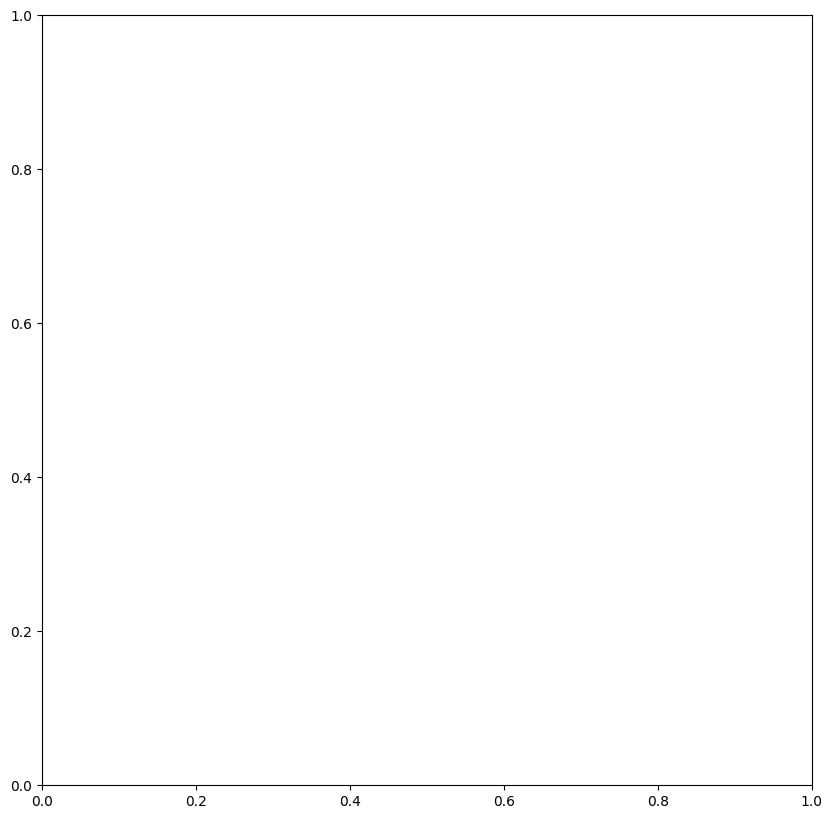

In [314]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))

# Plot the circuit "287"
circuit_287.plot(ax=ax, label="numeric_capacity", marker='o', legend=True, cmap='viridis', linewidth=0.8, edgecolor='black', geometry='geometry')
# for geom, label in zip(circuit_287.geometry, circuit_287['CIRCUIT_NAME']):
#     print("iterating")
    # x, y = geom.exterior.xy
    # ax.fill(x, y, alpha=0.5, fc='none', ec='black')  # Fill the polygons
    # ax.text(geom.centroid.x, geom.centroid.y, label, fontsize=8, ha='center')

ax.set_title('Circuit 287 Capacity')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


  CIRCUIT_NAME LABELTEXT_LCA  \
0         1006    Up To 1.00   
1         1023    Up To 1.00   
2         1039    Up To 1.00   
3         1047    Up To 1.00   
4         1071    Up To 1.00   

                                            geometry           SUBID  \
0  POLYGON ((-13020209.594 3850795.009, -13020209...  PROCTOR VALLEY   
1  POLYGON ((-13041491.403 3929164.521, -13041491...           LILAC   
2  POLYGON ((-13034378.931 3918335.533, -13034378...             ASH   
3  POLYGON ((-13028898.582 3862708.063, -13028898...    CHOLLAS WEST   
4  POLYGON ((-13102033.774 3967727.308, -13102034...   LAGUNA NIGUEL   

                            centroid  
0  POINT (-13020164.355 3850817.717)  
1  POINT (-13041445.903 3929187.462)  
2  POINT (-13034333.459 3918358.425)  
3  POINT (-13028853.314 3862730.827)  
4  POINT (-13101988.246 3967750.564)  


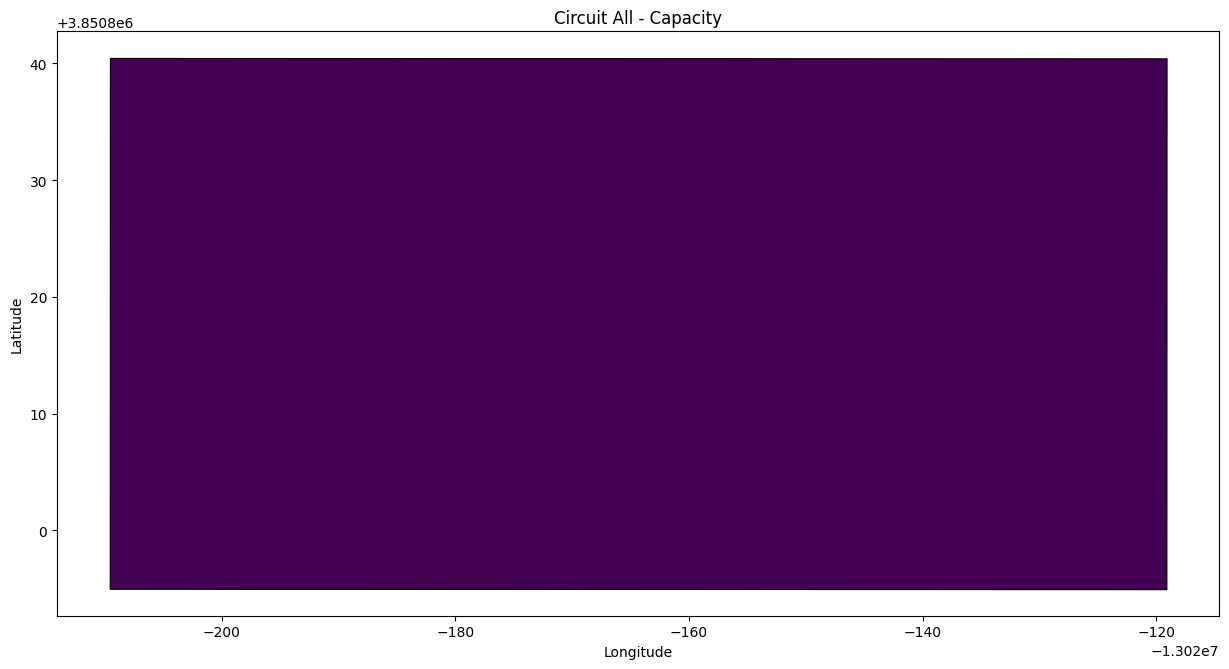

In [349]:
circuits_all = gdf[gdf['CIRCUIT_NAME'] != '287'].head(5)

print(circuits_all)

fig, ax = plt.subplots(figsize=(15, 10))

# Plot the circuit "287"
circuits_all.head(1).plot(ax=ax, label="numeric_capacity", marker='o', legend=True, cmap='viridis', linewidth=0.8, edgecolor='black')
# for geom, label in zip(circuit_287.geometry, circuit_287['CIRCUIT_NAME']):
#     print("iterating")
    # x, y = geom.exterior.xy
    # ax.fill(x, y, alpha=0.5, fc='none', ec='black')  # Fill the polygons
    # ax.text(geom.centroid.x, geom.centroid.y, label, fontsize=8, ha='center')

ax.set_title('Circuit All - Capacity')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

/Users/ana/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/gr/g6k4s8t13n98c8bw4ywdpxrr0000gn/T/ipykernel_7956/2728910065.py:5: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:3857

  circuits_with_census_tracts = gpd.sjoin(circuits_all, census_tracts, how='inner', op='intersects')


<Axes: >

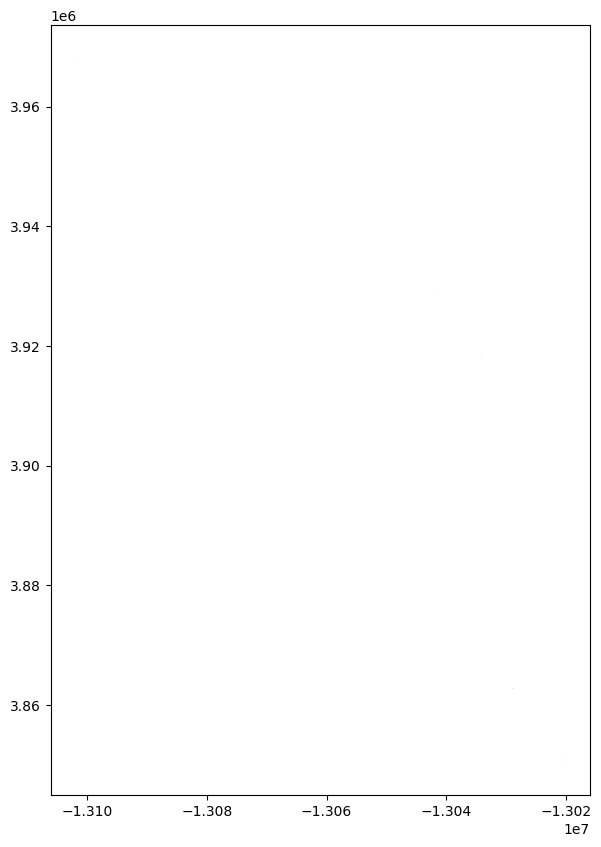

In [350]:
census_tracts = gpd.read_file("../data/raw/tl_2023_06_tract", layer="tl_2023_06_tract") # ctys

census_tracts = census_tracts.to_crs(epsg=3857)

circuits_with_census_tracts = gpd.sjoin(circuits_all, census_tracts, how='inner', op='intersects')

fig, ax = plt.subplots(figsize=(15, 10))

circuits_with_census_tracts.plot(ax=ax, marker="0")

# do an intersection on geometry of census tracts and circuit lines

In [351]:
import pandas as pd

# Create a mapping for the load capacity values
capacity_mapping = {
    "0*": 0,
    "Up To 1.00": 1,
    "1.00-1.50": 1.25,
    "1.50-2.00": 1.75,
    "Above 2": 2.5
}

# Filter for circuits where the LABELTEXT_LCA is "Up To 1.00"
zero_capacity_gdf = gdf[gdf['LABELTEXT_LCA'] == "Up To 1.00"]

print(len(zero_capacity_gdf))

# Group by CIRCUIT_NAME and get the relevant details
grouped_zero_capacity_gdf = zero_capacity_gdf.groupby('CIRCUIT_NAME').agg({
    'LABELTEXT_LCA': 'first',  # Keep the first LABELTEXT_LCA value
    'geometry': 'first',  # Keep the first geometry (adjust as needed)
    'SUBID': 'first'  # Assuming all entries for a circuit have the same substation
}).reset_index()

# Count the number of unique CIRCUIT_NAME entries
unique_circuit_count = grouped_zero_capacity_gdf['CIRCUIT_NAME'].nunique()
print("Number of unique circuits:", unique_circuit_count)

# Get the first 100 entries
first_100_entries = grouped_zero_capacity_gdf.head(100)

# Print the results
print(first_100_entries[['CIRCUIT_NAME', 'LABELTEXT_LCA', 'SUBID', 'geometry']])


100
Number of unique circuits: 100
   CIRCUIT_NAME LABELTEXT_LCA           SUBID  \
0          1006    Up To 1.00  PROCTOR VALLEY   
1          1023    Up To 1.00           LILAC   
2          1039    Up To 1.00             ASH   
3          1047    Up To 1.00    CHOLLAS WEST   
4          1071    Up To 1.00   LAGUNA NIGUEL   
..          ...           ...             ...   
95          291    Up To 1.00        BERNARDO   
96          293    Up To 1.00        BERNARDO   
97          296    Up To 1.00      SAN MARCOS   
98          297    Up To 1.00      SAN MARCOS   
99          299    Up To 1.00      SAN MARCOS   

                                             geometry  
0   POLYGON ((-13020209.594 3850795.009, -13020209...  
1   POLYGON ((-13041491.403 3929164.521, -13041491...  
2   POLYGON ((-13034378.931 3918335.533, -13034378...  
3   POLYGON ((-13028898.582 3862708.063, -13028898...  
4   POLYGON ((-13102033.774 3967727.308, -13102034...  
..                                      

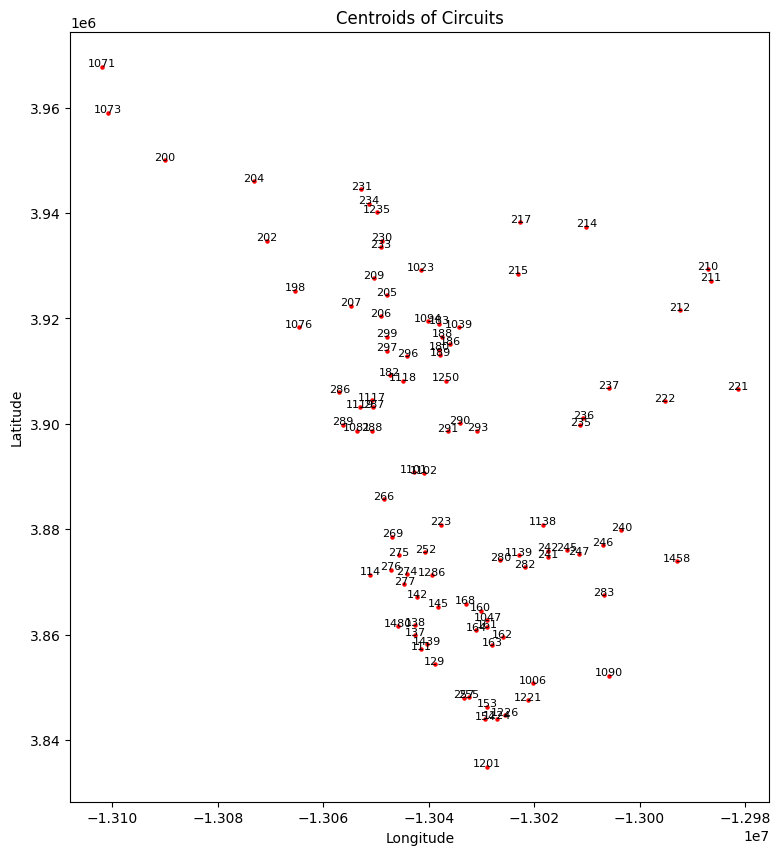

In [352]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

# Assuming your data is in a DataFrame called df
# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(first_100_entries, geometry='geometry')

# Calculate centroids of each polygon
gdf['centroid'] = gdf.geometry.centroid

# Plot the centroids
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the centroids of all circuits
gdf.set_geometry('centroid').plot(ax=ax, marker='o', color='red', markersize=5)
# ctx.add_basemap(ax, source=ctx.providers.Esri.WorldStreetMap)

# Add labels for each centroid
for x, y, label in zip(gdf.centroid.x, gdf.centroid.y, gdf['CIRCUIT_NAME']):
    ax.text(x, y, label, fontsize=8, ha='center')

ax.set_title('Centroids of Circuits')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


In [353]:
# Save the first 100 entries as a CSV file
first_100_entries.to_csv('../data/processed/sdge_bottom_100_circuits.csv', index=False)

In [354]:
# MULTILINESTRING ((-118.140753087511 33.9081570728002, -118.140089535557 33.9078415828392, -118.139749790735 33.9076800390959), (-118.138474901383 33.9066545110047, -118.138088586071 33.9072501595175), (-118.144316872623 33.911257389232, -118.144360268861 33.9111926643193), (-118.144670658796 33.9120709967617, -118.145017193604 33.9116157614879, -118.145538712828 33.9118866959977, -118.145330546959 33.9121956658628), (-118.134661675557 33.909416506104, -118.134761628187 33.9094149431128), (-118.141122240127 33.9064969153517, -118.141502489756 33.906754284395), (-118.141146220086 33.908371739623, -118.141118173992 33.9083558574883, -118.141181014163 33.9082595416071, -118.141431695097 33.9083694387788, -118.141429234737 33.9083792807855, -118.141428844008 33.9083893218563, -118.141430512683 33.9083992816145, -118.141434207392 33.9084088474318, -118.141439820621 33.9084177434403, -118.141447189834 33.9084257042022, -118.141456078245 33.9084324929248, -118.141466227929 33.9084379099867, -118.141477351282 33.9084418011334, -118.141489106984 33.9084440396634, -118.141501144718 33.908444553971, -118.141513106473 33.9084433446685, -118.141524656339 33.9084404473356, -118.141535428617 33.9084359348034, -118.141545114782 33.9084299497164, -118.141553426247 33.9084226697061, -118.141889851303 33.9085763399677), (-118.139672551324 33.9107593310408, -118.138586716296 33.9107415182454, -118.138604764346 33.9106442974603, -118.138726116402 33.9099905807144), (-118.144466682979 33.9113360243604, -118.145017193604 33.9116157614879), (-118.135037049277 33.9093582444054, -118.1351363052 33.9093307335369), (-118.141429846361 33.9084920976736, -118.141400919939 33.9084759063165), (-118.142376590226 33.9064431194523, -118.142374099894 33.9069043034547, -118.142364507832 33.907309228138, -118.1423198749 33.9074364846291, -118.142128733446 33.9075476898204), (-118.141118173992 33.9083558574883, -118.140753087511 33.9081570728002), (-118.141889851303 33.9085763399677, -118.142199148814 33.9087246207841, -118.142654168978 33.9087755186102), (-118.142376590226 33.9064431194523, -118.14238128763 33.9062443316368, -118.142382048942 33.9062119738596, -118.141947199131 33.9060614782837, -118.141605784985 33.9059495155432, -118.141122240127 33.9064969153517, -118.140779661967 33.9062443745404, -118.140667230119 33.9061673897397), (-118.141838195017 33.9077852095263, -118.141923474248 33.9077109588202), (-118.135392457612 33.907117953733, -118.134698527978 33.9067895502451), (-118.144316872623 33.911257389232, -118.144466682979 33.9113360243604), (-118.141434514912 33.9098712322817, -118.14148314558 33.9098939596863, -118.141602071658 33.9099495910631, -118.141851466882 33.9100686699874, -118.142361314969 33.9103123457779, -118.142726559659 33.9104765466871, -118.143650911941 33.9109378101071, -118.143882420906 33.9105863444692, -118.144043140075 33.9103560745908), (-118.144316872623 33.911257389232, -118.143650911941 33.9109378101071), (-118.145001998299 33.9089243505307, -118.145026298518 33.9089533342098, -118.144663097131 33.9094678452899, -118.144043140075 33.9103560745908, -118.143613569912 33.9101363770659, -118.143512715958 33.9100872624688, -118.143544862897 33.9097462040227, -118.143656552577 33.9086914723551, -118.143674320478 33.9085156773066, -118.143528330311 33.9083485733043), (-118.145026298518 33.9089533342098, -118.145072905365 33.9088854426048, -118.145273040741 33.9085939198546, -118.145624448817 33.9080904262072), (-118.145999683674 33.9120562282677, -118.145687349358 33.9119125307938, -118.145708074084 33.911824594732, -118.14567890525 33.9118126615294, -118.145668449776 33.911822109933, -118.145656193809 33.9118298967671, -118.145642487945 33.9118357897035, -118.145627769004 33.9118396142313, -118.145612479963 33.9118412516962, -118.145597083018 33.9118406454922, -118.145582048037 33.9118378273222, -118.145567821721 33.911832876, -118.145554845126 33.911825933521, -118.145543506415 33.9118172307525, -118.145534161472 33.9118070114878, -118.145527073054 33.9117955925336, -118.145522471952 33.9117833270671, -118.145520501502 33.9117705799009, -118.145521209153 33.9117577446964, -118.144431559092 33.9112274115969, -118.144426289252 33.9112317803634, -118.144420582508 33.9112357509703, -118.144414483862 33.9112392914352, -118.144408038414 33.9112423769894, -118.144401295574 33.9112449819222, -118.144394305947 33.9112470886286, -118.144387123379 33.9112486794731, -118.144379801813 33.9112497440344, -118.14437239737 33.9112502727725, -118.144364965157 33.9112502615682, -118.14435756252 33.9112497116921, -118.14435024576 33.9112486271304, -118.144343069059 33.9112470154961, -118.144336088827 33.9112448888909, -118.144329356124 33.9112422639752, -118.144322923141 33.9112391610064, -118.144316838847 33.9112356020755, -118.14431114797 33.9112316156257, -118.144305896344 33.9112272318936, -118.144301121176 33.9112224829997, -118.14429685973 33.9112174055732, -118.144293143901 33.9112120389985, -118.144290003421 33.9112064226802, -118.144287460498 33.9112005997004, -118.144285534109 33.9111946140725, -118.144284241091 33.9111885116339, -118.144283588547 33.9111823383124, -118.144283583606 33.911176141839, -118.1442842258 33.9111699682116, -118.144285509267 33.9111638643804, -118.1442874249 33.9111578773254, -118.143769394092 33.910900247666, -118.143762750794 33.9109046354724, -118.143755671361 33.9109085204967, -118.143748210555 33.9109118724694, -118.143740425371 33.9109146665116, -118.143732377154 33.9109168795077, -118.143724126264 33.9109184955658, -118.143715737425 33.9109195014591, -118.143707274361 33.910919890283, -118.143698804079 33.9109196578079, -118.143690390449 33.9109188079498, -118.143682099504 33.9109173446046, -118.143673993071 33.910915280726, -118.143666136258 33.9109126319422, -118.143658587745 33.9109094184508, -118.143651407364 33.9109056658495, -118.143644648484 33.9109014015996, -118.143638364567 33.9108966603764, -118.143632604754 33.9108914768953, -118.143627411776 33.9108858922442, -118.143622826229 33.9108799493341, -118.143618884416 33.9108736938219, -118.143615616189 33.9108671741295, -118.143613046016 33.9108604405327, -118.143611194062 33.9108535451507, -118.143610076167 33.9108465401431, -118.143609698485 33.9108394813667, -118.143610064972 33.9108324219929, -118.143611174187 33.9108254161456, -118.143531373539 33.9107901341536, -118.143481336889 33.9107383427043), (-118.145538712828 33.9118866959977, -118.14571219061 33.9116387556003, -118.145993406734 33.9112251380717, -118.146395641105 33.910629959474, -118.146755475852 33.9101109917563, -118.147014478654 33.9097374498311, -118.147392731344 33.909171003802, -118.147524400258 33.908947128077), (-118.139688293105 33.9097383876262, -118.139703506741 33.9090710558064, -118.139610596644 33.9090518577652, -118.139502303204 33.9090197848595, -118.13930362662 33.9089672970742, -118.139131845645 33.9089303892625, -118.13900502808 33.9089131583371, -118.138892013977 33.908888584939, -118.138838053451 33.9088649804909, -118.138784443149 33.9088262309273, -118.13870830943 33.9087795351677, -118.138653308774 33.9087422061684, -118.138501655317 33.9086223208847, -118.138349557299 33.9085213582672, -118.138241806756 33.908466575455, -118.137896117448 33.9082904852933, -118.137307493599 33.9080119378916, -118.137149794364 33.9079385134958, -118.136411474403 33.9075947412144, -118.137273107521 33.9062099068784, -118.137403233914 33.9059994833373, -118.137418775096 33.9055746597076, -118.137426308227 33.905414401126, -118.137494343319 33.9054129521497, -118.138531976184 33.9053749047539, -118.138919721722 33.9053606827642, -118.13891900609 33.9054063323078), (-118.142657670639 33.9081513155878, -118.142359391642 33.9080866882283, -118.142340089409 33.9080755230463, -118.141838195017 33.9077852095263, -118.14136464602 33.9075704829819, -118.140448141476 33.9071548899813, -118.140093443065 33.9069940501576), (-118.142230409052 33.9094555494546, -118.142081240646 33.9096944965231, -118.141851466882 33.9100686699874), (-118.139760884427 33.9053311422508, -118.140095826126 33.9053175305345), (-118.1351363052 33.9093307335369, -118.135428904323 33.9092476952781, -118.136452855048 33.9089811029894, -118.137309709847 33.908758000653, -118.137759750568 33.9086402918693, -118.13787407463 33.9085622900107), (-118.137426308227 33.905414401126, -118.137140425944 33.905436378052, -118.136593775168 33.9054491119073, -118.136218210236 33.9060895761097, -118.136056759094 33.9063649103893), (-118.137149794364 33.9079385134958, -118.137053627015 33.9080413171538, -118.137015099617 33.9080735573134, -118.136938958081 33.9081076074682, -118.135902310361 33.9082441657372, -118.135404216478 33.9082572718556), (-118.134809819883 33.9102181539195, -118.135031749483 33.9101981532483, -118.135271065659 33.9101642289656, -118.136116788477 33.9099414863241, -118.137260861829 33.909631466709, -118.137654157791 33.9095265977322, -118.137706624965 33.9095173381963, -118.137827308687 33.9098891448845, -118.13778817619 33.910052674973, -118.137719050737 33.910243318096, -118.137276460635 33.9110680617345, -118.136749070957 33.9110593913592, -118.135965824761 33.9110417779773), (-118.136790265333 33.9072677860782, -118.136714711486 33.9072358233358, -118.136711240933 33.9072397585213, -118.136707367688 33.9072434241662, -118.136703123812 33.9072467911158, -118.136698541404 33.9072498329205, -118.13669365477 33.9072525267178, -118.13668850365 33.9072548513985, -118.136683126749 33.9072567894705, -118.136677566043 33.9072583252152, -118.136671865715 33.9072594465008, -118.136666067835 33.9072601448225, -118.136660219929 33.9072604152325, -118.136654365232 33.9072602555282, -118.136648550259 33.9072596661821, -118.136642819422 33.9072586521954, -118.136637217183 33.9072572221761, -118.136631788024 33.9072553865358, -118.136626573246 33.9072531602246, -118.136621613079 33.9072505591045, -118.136616946743 33.9072476044576, -118.136612610226 33.9072443184977, -118.136608636319 33.9072407270756, -118.136605056757 33.9072368578555, -118.136601897901 33.9072327412566, -118.136599186138 33.9072284095017, -118.136596942446 33.9072238948632, -118.136595182446 33.9072192332707, -118.136593920686 33.9072144615653, -118.136593167368 33.9072096148245, -118.136592928424 33.9072047326744, -118.136593204334 33.9071998511842, -118.13659399453 33.9071950091382, -118.136595293027 33.9071902444687, -118.136597088407 33.9071855933546, -118.136599367089 33.9071810919948, -118.13602051706 33.9069140772664, -118.135455921251 33.9066535478506), (-118.133974777873 33.9088605084009, -118.133969330756 33.9098227169932, -118.133117385133 33.9098583193752), (-118.139703506741 33.9090710558064, -118.140116011584 33.909248167248, -118.140799486415 33.9095823198321), (-118.135471973614 33.9071562585669, -118.135849876228 33.9073329676552, -118.136411474403 33.9075947412144, -118.136589534885 33.9075310345728, -118.136628531846 33.9075023145942, -118.136731445114 33.9073551074276, -118.13673706773 33.9073467469006, -118.136790265333 33.9072677860782, -118.137638334511 33.9076719224354, -118.138280964069 33.9079813711675), (-118.137719050737 33.910243318096, -118.137254794381 33.9102784730872, -118.136306106213 33.9103587741656), (-118.134483045572 33.906680786779, -118.134698527978 33.9067895502451, -118.134676138613 33.9068799719115, -118.134669979704 33.9069250078388, -118.134656896145 33.9077015299828, -118.134661971796 33.908898137691, -118.134661675557 33.909416506104, -118.134691732122 33.9107231591656, -118.134679733711 33.9109771668101, -118.135219851225 33.9109853914529, -118.135576419901 33.9109935584974), (-118.141353580737 33.9098351702504, -118.140799486415 33.9095823198321, -118.141033854068 33.9091773900295, -118.141429846361 33.9084920976736, -118.141838195017 33.9077852095263), (-118.137706624965 33.9095173381963, -118.137899370071 33.9094833033352, -118.138041726319 33.9094667081766, -118.138139130261 33.909461460343, -118.138445426429 33.9094449377716, -118.138558960139 33.9094468030072, -118.138893083563 33.9094854264595, -118.139226211864 33.9095666231298, -118.139518927822 33.9096755509418, -118.139574722699 33.9096962504245, -118.139688293105 33.9097383876262, -118.139683114877 33.9099541748774, -118.139674883811 33.9103179800671, -118.139666535395 33.9106468067614, -118.139672551324 33.9107593310408, -118.14081046782 33.9107780118096), (-118.133941789398 33.9069670914775, -118.133940397562 33.9069946302043, -118.133990738741 33.9070561338439, -118.133974777873 33.9088605084009), (-118.133916854968 33.9056525468762, -118.133893007203 33.9042998108377), (-118.134565563758 33.9055081182307, -118.134598752664 33.9055771305238, -118.134667214512 33.9057338210728, -118.13470207271 33.9058381114055, -118.134710182035 33.9058775020515, -118.134732290572 33.9060466005082, -118.134734050817 33.9061248296001, -118.134728587695 33.9062029403626, -118.134723135367 33.9062810501227, -118.134719487776 33.9062913818205, -118.134686971558 33.9063709475707, -118.13465782405 33.9064342392664, -118.134594822518 33.9065235731702, -118.134483045572 33.906680786779, -118.134091046201 33.9065132639846, -118.133932186783 33.9063675772412, -118.134164932741 33.9063959488613, -118.134480673367 33.90657170061, -118.134478435398 33.9065811598647, -118.134478170525 33.9065908020554, -118.134479887905 33.9066003385093, -118.134483534111 33.9066094919522, -118.134489000596 33.9066179883232, -118.134496138031 33.9066255773844, -118.134504730343 33.9066320329608, -118.134514520938 33.9066371725388, -118.134525212485 33.9066408410351, -118.134536504909 33.9066429212691, -118.134548062322 33.9066433685374, -118.134559534989 33.9066421544969, -118.134570589299 33.9066393246074, -118.134580900757 33.9066349594163, -118.134590170315 33.9066291825247, -118.134598113727 33.9066221733119, -118.136384631156 33.9074584091198, -118.136384827264 33.9074687847611, -118.136386087079 33.9074791154164, -118.136388403986 33.9074893100611, -118.136391767319 33.90749929845, -118.13639616206 33.9075090085747, -118.13640153211 33.9075183697073, -118.136407851638 33.9075273099392, -118.1364150755 33.9075357692635, -118.136423147465 33.9075436670334, -118.136431999907 33.9075509605846, -118.136441576964 33.9075575972239, -118.136451798874 33.9075635163621, -118.136462601231 33.9075686735014, -118.136473883148 33.9075730461247, -118.13648558983 33.9075765806274, -118.136497611966 33.9075792717051, -118.13650987229 33.9075810839971, -118.13652226137 33.907582003182, -118.136534715529 33.9075820397674, -118.136547113319 33.9075811705246, -118.136559380488 33.9075794240956, -118.136571429447 33.9075768021906, -118.136583153274 33.9075733166185, -118.136594476768 33.9075690059505, -118.136605313769 33.907563898037, -118.138003662957 33.9082365312204, -118.13831304164 33.908388332904, -118.138402090775 33.9084429449142, -118.138658070816 33.9086287199869, -118.138893115549 33.908800880968, -118.138982579857 33.9088377757149, -118.13911602685 33.9088741310424, -118.13949832027 33.9089615657134, -118.139727533204 33.9090208563444, -118.139869753912 33.9090744377199, -118.140321251496 33.9092697888806, -118.140766136473 33.9094997697327, -118.140765375381 33.9095055620683, -118.140765217203 33.9095113875985, -118.140765662442 33.9095172030304, -118.140766707279 33.9095229651112, -118.140768344634 33.9095286297164, -118.14077056206 33.9095341554769, -118.140773342793 33.9095395019651, -118.140776666813 33.909544627882, -118.14078050766 33.9095494955954, -118.140784838898 33.9095540692767, -118.14078962653 33.909558314069, -118.140794836611 33.9095621987224, -118.140800427646 33.9095656938606, -118.140806360353 33.9095687736941, -118.140812588997 33.9095714151987, -118.140819067889 33.9095735989572, -118.140825749216 33.9095753082775, -118.140832581966 33.9095765301045, -118.140839515189 33.9095772558918, -118.140846497982 33.9095774806999, -118.140853477315 33.9095772023145, -118.140860402368 33.9095764221081, -118.140867221315 33.9095751468737, -118.140873882363 33.9095733861096, -118.14088033592 33.9095711519988, -118.140886534638 33.909568463017, -118.140892432242 33.9095653367275, -118.140897983645 33.9095617987997, -118.141314364971 33.9097597198214, -118.141410964038 33.9097303581237, -118.141545497209 33.9097970529495, -118.141566013286 33.9098643517708, -118.141813411371 33.9099794469356, -118.141813329623 33.9099857262832, -118.141813893367 33.9099919870207, -118.141815097698 33.9099981859055, -118.141816934411 33.9100042752162, -118.141819389937 33.9100102108886, -118.141822446395 33.9100159498002, -118.141826081578 33.9100214488687, -118.14183026792 33.9100266686688, -118.141834975689 33.9100315697952, -118.141840168716 33.9100361165097, -118.141845810878 33.9100402766811, -118.14185185847 33.9100440173465, -118.141858268975 33.9100473136485, -118.141864994448 33.9100501389766, -118.141871985954 33.910052473944, -118.141879191354 33.9100543018991, -118.141886557449 33.9100556080039, -118.141894031112 33.9100563828307, -118.141901557114 33.9100566214806, -118.141909080263 33.9100563217598, -118.141916544343 33.9100554859932, -118.141923895352 33.9100541200925, -118.141931079345 33.910052234478, -118.141938042428 33.9100498431772, -118.141944735069 33.9100469628823, -118.141951106711 33.9100436148044, -118.143313909729 33.9106921240823, -118.143394627471 33.9106988996613), (-118.144840668919 33.9087318786718, -118.144439978135 33.9082538980934, -118.144445346155 33.9080262588198, -118.144224656608 33.9078418084741, -118.144018894155 33.9076994466885), (-118.138871154374 33.9056394670299, -118.138807200555 33.9058765689908, -118.138474901383 33.9066545110047), (-118.133918289195 33.9057348011947, -118.133917611669 33.9056964594506), (-118.133945233287 33.9068909752691, -118.133938511655 33.9065246995432, -118.133933592735 33.9064309491156, -118.133932186783 33.9063675772412, -118.133918289207 33.9057348020964), (-118.140095826126 33.9053175305345, -118.140120337551 33.9055507218436, -118.140096684009 33.9058124395095, -118.140017826087 33.9060133215201, -118.139994458151 33.9060728607013, -118.139629577652 33.9066413280613, -118.139347756573 33.9070803905929, -118.138960784562 33.907683267042, -118.138613784735 33.9082360228773, -118.138817422676 33.908331605336, -118.138893885454 33.9083628955072, -118.139065173451 33.908310154745, -118.139215341181 33.9083655085626, -118.13970085323 33.908582836367, -118.140279978398 33.9088438769865), (-118.134710182035 33.9058775020515, -118.135150934683 33.9058840562734, -118.135497132683 33.9053738154788, -118.135692220311 33.9050862773997, -118.136010749753 33.9046168098903, -118.136526717194 33.904588318103, -118.137714816269 33.9045347754394, -118.138652150444 33.9044709248775), (-118.138919721722 33.9053606827642, -118.139379135573 33.9053426059001, -118.139477387999 33.905339545185), (-118.144497637538 33.9109876719736, -118.144762557138 33.9105925826314, -118.14523657222 33.9098951494844, -118.14538464166 33.9096772947602, -118.145568450175 33.9094044227698, -118.146069619339 33.9086604326644), (-118.147641909767 33.9115349762273, -118.148372491198 33.9120239901907, -118.148026615739 33.912499341296, -118.146873975928 33.9124804984759, -118.146146091268 33.9121220526279))

In [355]:
# Hi Matto and Gabe! Here are the top 100 feeders by capacity in the SDGE area, as well as the 100 feeders with low capacity (defined by SDGE as "Up to 1 MW"). I hope this is what you're looking for! Let me know if there's anything else you may need.